In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
%matplotlib inline

### Union de 4 tablas

Union de 4 tablas (en formato csv) con datos de encuestas, fueron unidas en un solo dataframe con el nombre de "encuesta"

In [46]:
encuesta = pd.concat([pd.read_csv(f, encoding='UTF-8') 
                      for f in glob.glob('./data/ENCUESTA_*_Responses.csv')], ignore_index=True)

In [47]:
encuesta.shape # el nuevo DatFrame consta de 5823 renglones y 164 columnas

(5823, 164)

In [48]:
encuesta.columns # columnas de nuestro dataframe

Index(['Date Collected', 'Date Sent', 'Duration (seconds)', 'User', 'Latitude',
       'Longitude', 'Ubicación', 'Municipio', 'Sección Electoral', 'Manzana',
       ...
       '¿Algún otro canal de televisión de paga que se le venga a la mente? (NO DAR OPCIONES, RESPUESTA ESPONTÁNEA).1',
       'Pensando en las estaciones de radio que escucha normalmente, ¿cuál es la primera estación de radio que se le viene a la mente? (NO DAR OPCIONES, RESPUESTA ESPONTÁNEA)',
       '¿Alguna otra estación de radio que se le venga a la mente?',
       '¿Alguna otra estación de radio que se le venga a la mente?.1',
       '¿Estaría dispuesto o no estaría dispuesto a participar en una sesión de grupo de 2 horas, en donde se le diera un incentivo de 300 pesos para comentar sobre temas de política?',
       '¿Por qué?', '¿Me podría dar su número celular para que lo contacten?',
       '¿Cuál es el total de cuartos, piezas o habitaciones con las que cuenta su hogar? Por favor no incluya baños, medios baños

### Seleccion de las primeras 15

In [49]:
encuesta.iloc[:, :15]

,Date Collected,Date Sent,Duration (seconds),User,Latitude,Longitude,Ubicación,Municipio,Sección Electoral,Manzana,"Buenas tardes vengo de parte de CABILDO Agencia de Consultoría a realizar una consulta popular. Estamos haciendo una investigación cuyo objetivo es conocer las opiniones de la población. Necesitamos hablar unos minutos con una persona que tenga 18 años o más para antes del próximo 1 de julio, que viva aquí, que esté en este momento y que tenga su credencial de elector de este municipio. ¿Hay alguna persona que cumpla con estos requisitos?","Usted es una de las personas que hemos elegido para este estudio, ¿me permitiría unos minutos para hacerle algunas preguntas? La entrevista es anónima y la información que nos proporcione es estrictamente confidencial y solo se utilizará con fines estadísticos. No necesito saber su nombre u otros datos que lo identifiquen, solo sus respuestas sinceras. Si prefiere no responder alguna pregunta, dígame y pasamos a la siguiente.",Género,¿Cuántos años cumplidos tiene usted?,"En las pasadas elecciones de 2015, ¿usted asistió a votar o no asistió a votar?"
0,2018-06-14 11:53:47 -0600,2018-06-14 14:11:52 -0600,682,Sonora01,26.390231,-109.115619,"26,390521,-109,116739",Huatabampo,1228.0,3.0,Yes,Si acepta entrevista,Female,45 a 49 años,Sí asistió
1,2018-05-08 11:06:58 -0600,2018-05-08 11:07:00 -0600,461,Sonora01,29.157507,-111.010630,"29.157242,-111.010227",Hermosillo,1334.0,571.0,Yes,Si acepta entrevista,Female,60 a 64 años,Sí asistió
2,2018-04-17 20:38:33 -0600,2018-04-17 20:38:35 -0600,384,Sonora10,27.562943,-109.931075,"27.563267,-109.931091",Cajeme,951.0,31.0,Yes,Si acepta entrevista,Male,45 a 49 años,Sí asistió
3,2018-04-17 17:34:00 -0600,2018-04-17 17:35:03 -0600,1742,Sonora09,29.054577,-111.011745,"29.054419,-111.011722",Hermosillo,1404.0,28.0,Yes,Si acepta entrevista,Female,45 a 49 años,Sí asistió
4,2018-04-17 17:03:23 -0600,2018-04-17 17:04:26 -0600,669,Sonora09,29.112673,-111.047853,"29.111939,-111.047761",Hermosillo,1481.0,90.0,Yes,Si acepta entrevista,Female,45 a 49 años,Sí asistió
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,07/03/18 12:05,07/03/18 15:59,44,Electoral3,29.005548,-110.939164,NaN,Hermosillo,NaN,99.0,NaN,No acepta entrevista,NaN,NaN,NaN
5819,07/03/18 11:59,07/03/18 15:54,152,Electoral1,29.005515,-110.939109,NaN,Hermosillo,NaN,9999.0,NaN,NaN,NaN,NaN,NaN
5820,07/03/18 11:59,07/03/18 15:59,134,Electoral3,29.005544,-110.939155,NaN,Hermosillo,NaN,99.0,NaN,NaN,NaN,NaN,NaN
5821,07/03/18 11:59,07/03/18 16:19,59,Electoral2,29.005575,-110.939225,NaN,Hermosillo,NaN,99.0,NaN,NaN,NaN,NaN,NaN


### Cambio de Nombre de columna

Renombraremos 3 de las columnas por un nombre más conciso

In [50]:
encuesta.rename(columns={'Usted es una de las personas que hemos elegido para este estudio, ¿me permitiría unos minutos para hacerle algunas preguntas? La entrevista es anónima y la información que nos proporcione es estrictamente confidencial y solo se utilizará con fines estadísticos. No necesito saber su nombre u otros datos que lo identifiquen, solo sus respuestas sinceras. Si prefiere no responder alguna pregunta, dígame y pasamos a la siguiente.':'acepta entrevista'}, inplace=True)
encuesta.rename(columns={'Duration (seconds)':'seconds'}, inplace=True)
encuesta.rename(columns={'¿En este hogar cuentan con estufa de gas o eléctrica?':'estufa'}, inplace=True)

### Seleccion de columnas

El Objetivo será el de medir el tiempo de realización de cada encuesta según el encuestador, para eso seleccionaremos las siguientes 4 columnas
    1. User (para conocer el usuario que realizó cada entrevista)
    2. seconds (mide el tiempo de elaboración de cada entrevista, buscaremos outliers)
    3. acepta entrevista (para conocer si una persona no acepto hacer la entrevista influye en los outliers de tiempo)
    4. estufa (si llegamos a dicha pregunta, la entrevista fue completada)

In [51]:
poll = encuesta[['User', 'seconds', 'acepta entrevista', 'estufa']]

In [52]:
poll.head()

,User,seconds,acepta entrevista,estufa
0,Sonora01,682,Si acepta entrevista,Sí tiene
1,Sonora01,461,Si acepta entrevista,Sí tiene
2,Sonora10,384,Si acepta entrevista,Sí tiene
3,Sonora09,1742,Si acepta entrevista,Sí tiene
4,Sonora09,669,Si acepta entrevista,Sí tiene


In [53]:
poll.isna() # en busqueda de celdas vacias

,User,seconds,acepta entrevista,estufa
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5818,False,False,False,True
5819,False,False,True,True
5820,False,False,True,True
5821,False,False,True,True


In [54]:
count_nan = len(poll) - poll.count() #cantidad de celdas vacias por columna
print(count_nan)  

User                   0
seconds                0
acepta entrevista     18
estufa               168
dtype: int64


### Usuarios

In [55]:
poll['User'].unique() #usuarios unicos

array(['Sonora01', 'Sonora10', 'Sonora09', 'Sonora12', 'Sonora08',
       'Sonora14', 'Sonora05', 'Sonora02', 'Sonora06', 'Sonora03',
       'Sonora07', 'Sonora04', 'Sonora11', 'Sonora13', 'EmilioSonora',
       'Electoral2', 'Electoral4', 'Electoral3', 'Electoral1',
       'Electoral5', 'Electoral6', 'Electoral10', 'Electoral7',
       'Electoral12', 'Electoral9', 'Electoral8', 'Electoral11'],
      dtype=object)

### Pregunta entrevista

In [56]:
poll['acepta entrevista'].unique() #datos unicos de "acepta entrevista"

array(['Si acepta entrevista', nan, 'No acepta entrevista'], dtype=object)

In [57]:
poll['estufa'].unique() # datos unicos de estufa

array(['Sí tiene', 'No tiene', nan, 'Si tiene'], dtype=object)

In [58]:
#homologando condiciones escritas de manera distinta que signifacan lo mismo

poll['estufa'] = poll['estufa'].replace(['Sí tiene'],'Si tiene') 
poll['estufa'].unique()

<ipython-input-58-14f2e8973e68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poll['estufa'] = poll['estufa'].replace(['Sí tiene'],'Si tiene')


array(['Si tiene', 'No tiene', nan], dtype=object)

### Verificando si influye que no acepten entrevista con tiempos en ceros

¿es posible tener registros con 0 segundos de duracion por personas que no aceptaron la entrevista?

In [59]:
poll[(poll['seconds'] == 0) & (poll['acepta entrevista'] == 'No acepta entrevista')] # no se encontraron registros

,User,seconds,acepta entrevista,estufa


### Label Encoder en columna de usuarios

para manejar de una manera más sencillas lo diferentes usuarios usaremos label encoder, para convertirlos en numeros consecutivos

In [60]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
poll['User']= label_encoder.fit_transform(poll['User'].fillna('0')) 
  
poll['User'].unique()

<ipython-input-60-765712699e82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poll['User']= label_encoder.fit_transform(poll['User'].fillna('0'))


array([13, 22, 21, 24, 20, 26, 17, 14, 18, 15, 19, 16, 23, 25, 12,  4,  6,
        5,  0,  7,  8,  1,  9,  3, 11, 10,  2])

Haremos lo mismo para la columna "acepta entrevista", conviertiendo a cero las celdas vacias
     * 0 = Celdas Vacias
     * 1 = No Acepta Entrevista
     * 2 = Si Acepta Entrevista

In [61]:
poll['acepta entrevista']= label_encoder.fit_transform(poll['acepta entrevista'].fillna('0')) 
  
poll['acepta entrevista'].unique()

<ipython-input-61-7197e498925b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poll['acepta entrevista']= label_encoder.fit_transform(poll['acepta entrevista'].fillna('0'))


array([2, 0, 1])

Haremos lo mismo para la columna "estufa", conviertiendo a cero las celdas vacias

 * 0 = Celdas Vacias
 * 1 = No tiene
 * 2 = Si tiene

In [62]:
poll['estufa']= label_encoder.fit_transform(poll['estufa'].fillna('0')) 
  
poll['estufa'].unique()

<ipython-input-62-0cf0fe6269d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poll['estufa']= label_encoder.fit_transform(poll['estufa'].fillna('0'))


array([2, 1, 0])

In [63]:
poll.describe() #datos estadisticos de dataframe

,User,seconds,acepta entrevista,estufa
count,5823.000000,5.823000e+03,5823.000000,5823.000000
mean,16.560192,5.122583e+04,1.973553,1.933196
std,7.035473,3.863152e+06,0.178704,0.346503
min,0.000000,0.000000e+00,0.000000,0.000000
25%,13.000000,4.200000e+02,2.000000,2.000000
50%,18.000000,5.310000e+02,2.000000,2.000000
75%,22.000000,6.735000e+02,2.000000,2.000000
max,26.000000,2.947922e+08,2.000000,2.000000


### buscando outliers con scatterplot

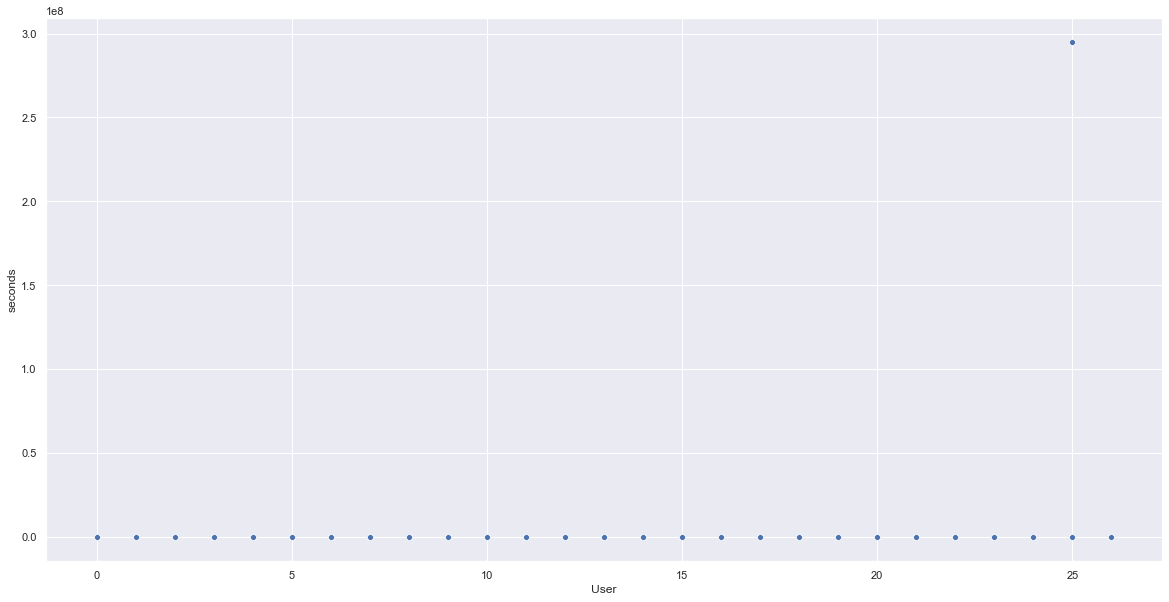

In [64]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='User', y='seconds', data= poll)


### buscando outliers con boxplot

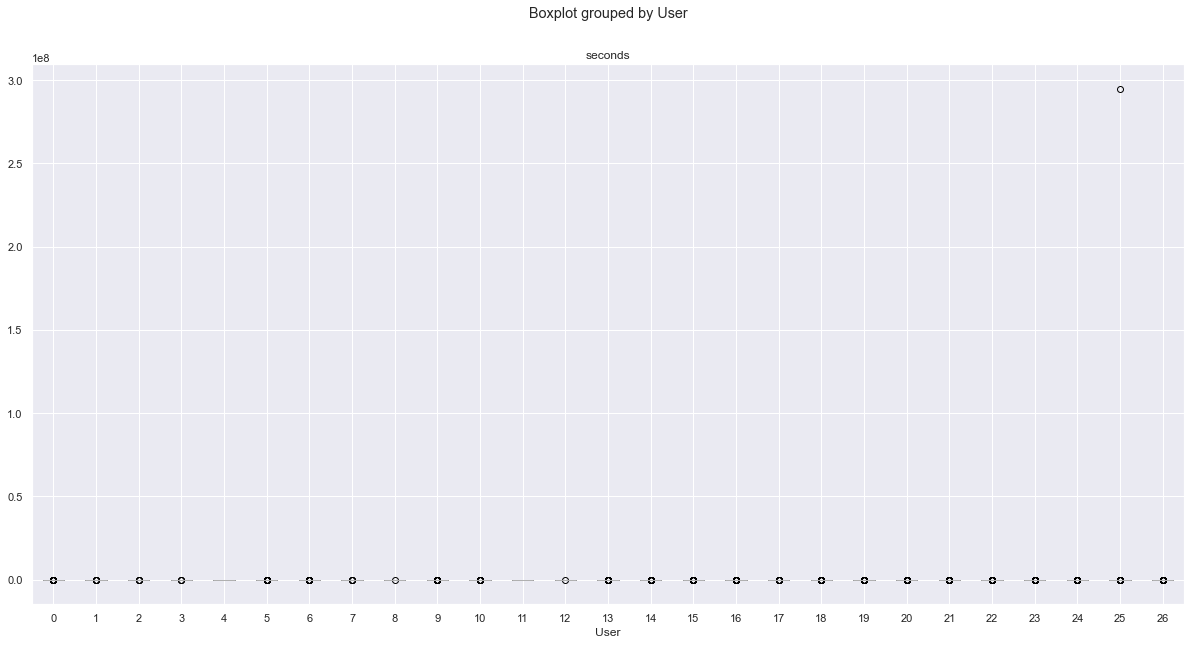

In [65]:
poll.boxplot(by='User', column=['seconds'], figsize=(20,10))

### buscando outlier drastico
Existe un outlier muy alejado al resto, que evita poder ver a detalle el resto de los datos, el sistema de registro de las encuestas debe ser cerrado al momento de finalizar la entravista, de no ser asi el tiempo seguirá corriendo por esa razón obtenemos este tipo de datos

Por lo anterior decidimos eliminarlo

In [66]:
poll[(poll['seconds'] > 30000) & (poll['User']== 25)].index[0]

1184

In [67]:
poll[(poll['seconds'] > 30000) & (poll['User']== 25)]

,User,seconds,acepta entrevista,estufa
1184,25,294792222,2,2


### quitando outlier

In [68]:
poll= poll.drop(poll[poll['seconds'] == 294792222].index)

In [69]:
poll.describe()

,User,seconds,acepta entrevista,estufa
count,5822.000000,5822.000000,5822.000000,5822.000000
mean,16.558743,600.447097,1.973549,1.933184
std,7.035207,436.311993,0.178719,0.346531
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,420.000000,2.000000,2.000000
50%,18.000000,531.000000,2.000000,2.000000
75%,22.000000,673.000000,2.000000,2.000000
max,26.000000,8047.000000,2.000000,2.000000


### nuevo boxplot sin col 1184

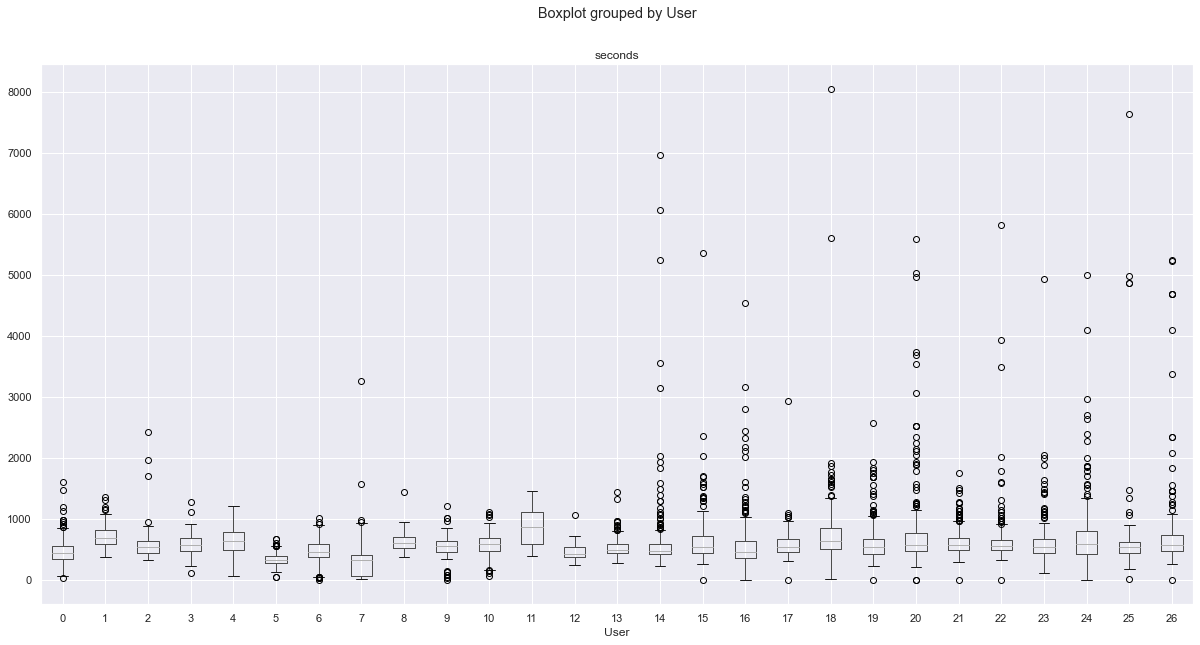

In [70]:
poll.boxplot(by='User', column=['seconds'], figsize=(20,10))

### scatterplot

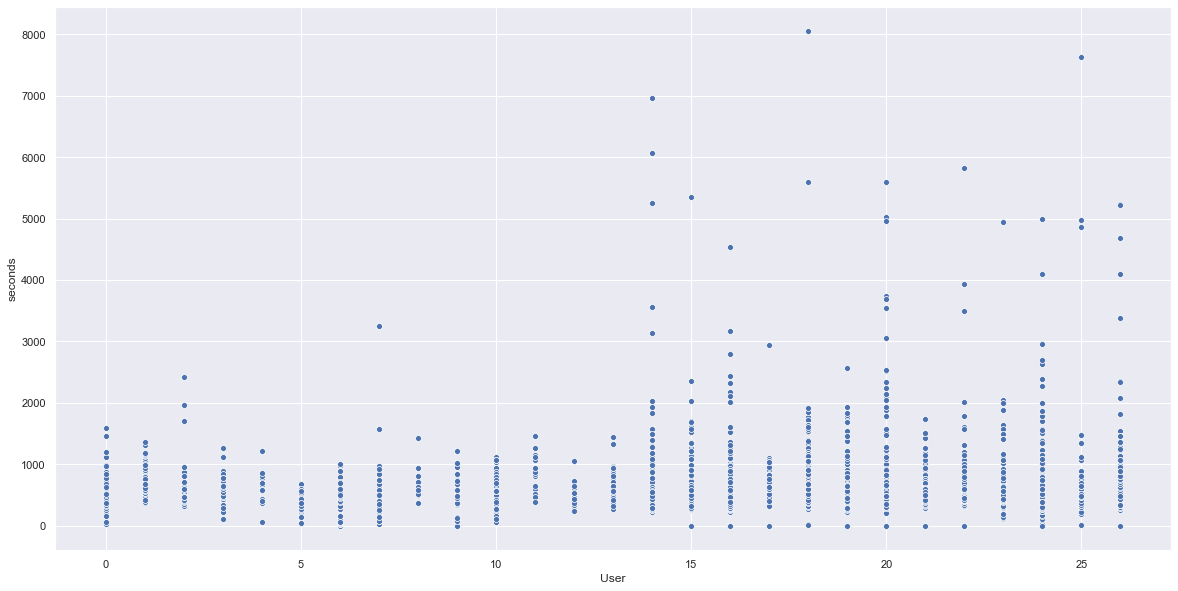

In [71]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='User', y='seconds', data= poll)

### Removiendo datos de personas que no aceptaron la entrevista

In [72]:
poll= poll.drop(poll[poll['acepta entrevista'] == 1].index)

In [73]:
poll

,User,seconds,acepta entrevista,estufa
0,13,682,2,2
1,13,461,2,2
2,22,384,2,2
3,21,1742,2,2
4,21,669,2,2
...,...,...,...,...
5814,2,463,2,2
5819,0,152,0,0
5820,5,134,0,0
5821,4,59,0,0


### Buscando Outliers por medio de KNN (K Nearest Neighbors)

In [74]:
x =poll[['User', 'seconds']].values # obtenemos la matriz "x" de los valores del dataframe "User" y "seconds"
x

array([[ 13, 682],
       [ 13, 461],
       [ 22, 384],
       ...,
       [  5, 134],
       [  4,  59],
       [  6, 155]])

In [75]:
# utilizando NearestNeighbors de scikit learn 
from sklearn.neighbors import NearestNeighbors
nbrs= NearestNeighbors(n_neighbors = 25) # analizando los 25 puntos más cercanos de cada punto
nbrs.fit(x)

NearestNeighbors(n_neighbors=25)

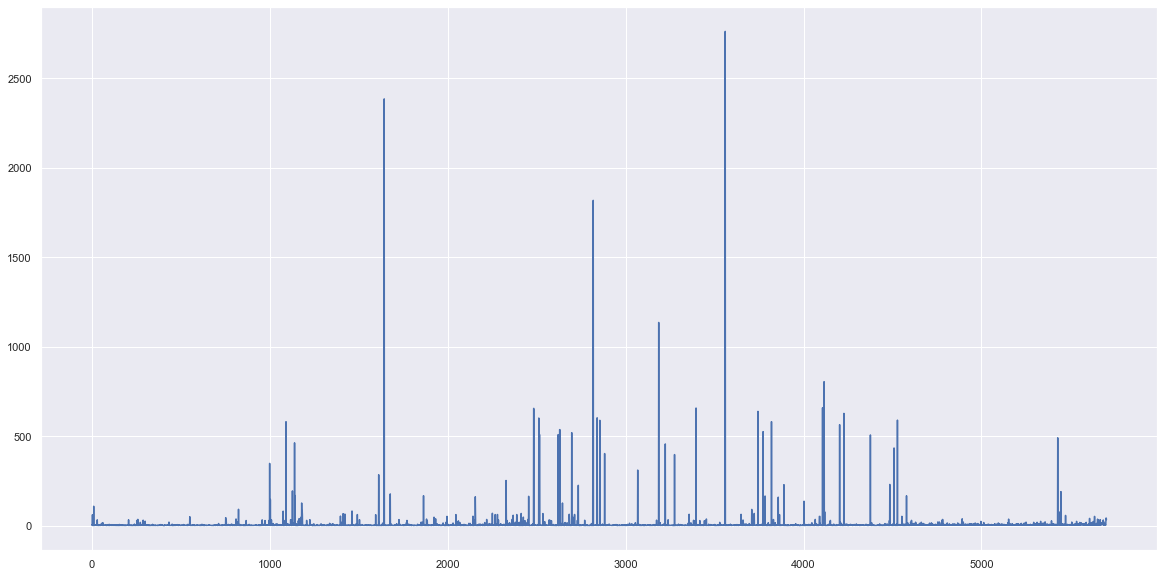

In [76]:
distances, indexes = nbrs.kneighbors(x) # obtenemos las distancias resultantes del analisis y graficamos
plt.plot(distances.mean(axis =1))

In [77]:
#nueva matriz con los datos de los outliers resultantes considerando outliers distancias mayores de 15
outlier_index = np.where(distances.mean(axis = 1) > 15) 
outlier_index

(array([   3,   10,   30,   61,  206,  254,  258,  272,  288,  299,  433,
         550,  752,  755,  810,  815,  820,  824,  867,  957,  973,  995,
         996,  999, 1003, 1004, 1009, 1075, 1086, 1091, 1117, 1127, 1134,
        1139, 1141, 1160, 1161, 1165, 1167, 1170, 1171, 1177, 1179, 1180,
        1182, 1183, 1207, 1225, 1397, 1403, 1412, 1422, 1462, 1492, 1504,
        1595, 1612, 1613, 1643, 1677, 1726, 1768, 1771, 1851, 1861, 1864,
        1881, 1885, 1923, 1926, 1932, 1974, 1990, 1996, 2030, 2046, 2054,
        2060, 2068, 2142, 2145, 2147, 2155, 2156, 2208, 2219, 2251, 2267,
        2279, 2280, 2285, 2328, 2329, 2332, 2348, 2362, 2363, 2368, 2380,
        2388, 2390, 2396, 2406, 2413, 2415, 2425, 2430, 2434, 2447, 2450,
        2452, 2455, 2483, 2484, 2485, 2512, 2515, 2516, 2517, 2535, 2545,
        2569, 2571, 2572, 2573, 2574, 2575, 2583, 2620, 2621, 2629, 2630,
        2631, 2632, 2645, 2657, 2660, 2671, 2683, 2684, 2697, 2704, 2713,
        2729, 2732, 2734, 2770, 2815, 

In [78]:
#dataframe de outliers
outlier_values = poll.iloc[outlier_index]
outlier_values.head()

,User,seconds,acepta entrevista,estufa
3,21,1742,2,2
10,26,2071,2,2
30,20,1523,2,2
61,21,1259,2,2
206,13,1438,2,2


In [79]:
outlier_values.shape #tamaño de dataframe outliers

(269, 4)

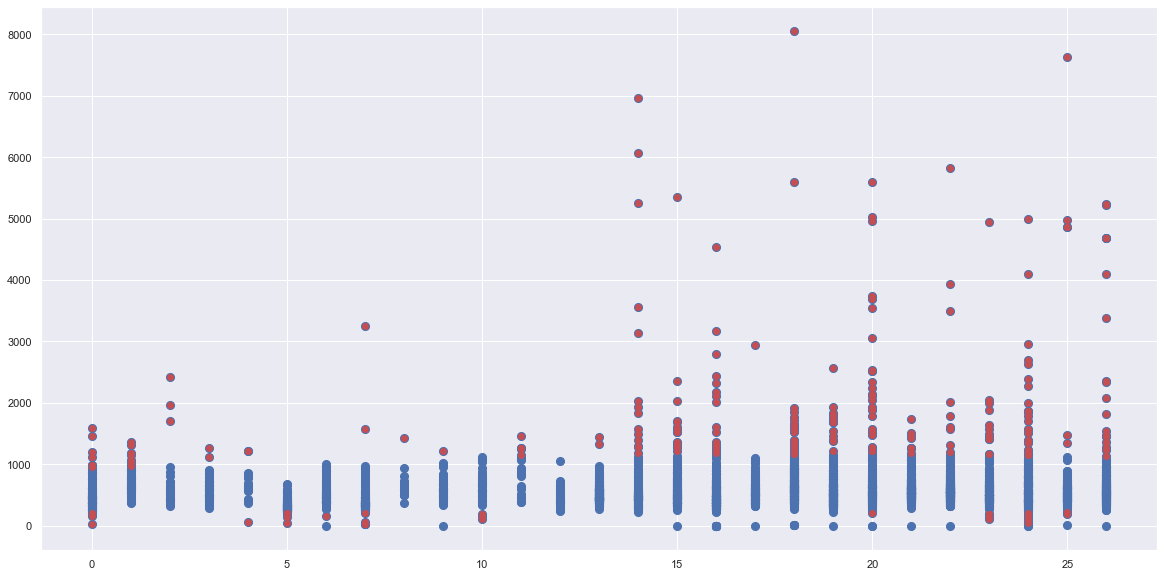

In [80]:
# Graficando nuestro dataframe original de color azul
plt.scatter(poll["User"], poll["seconds"], color = "b", s = 65)
# Graficando outliers de color rojo
plt.scatter(outlier_values["User"], outlier_values["seconds"], color = "r")

### Graficando outliers resultantes de knn por usuarios

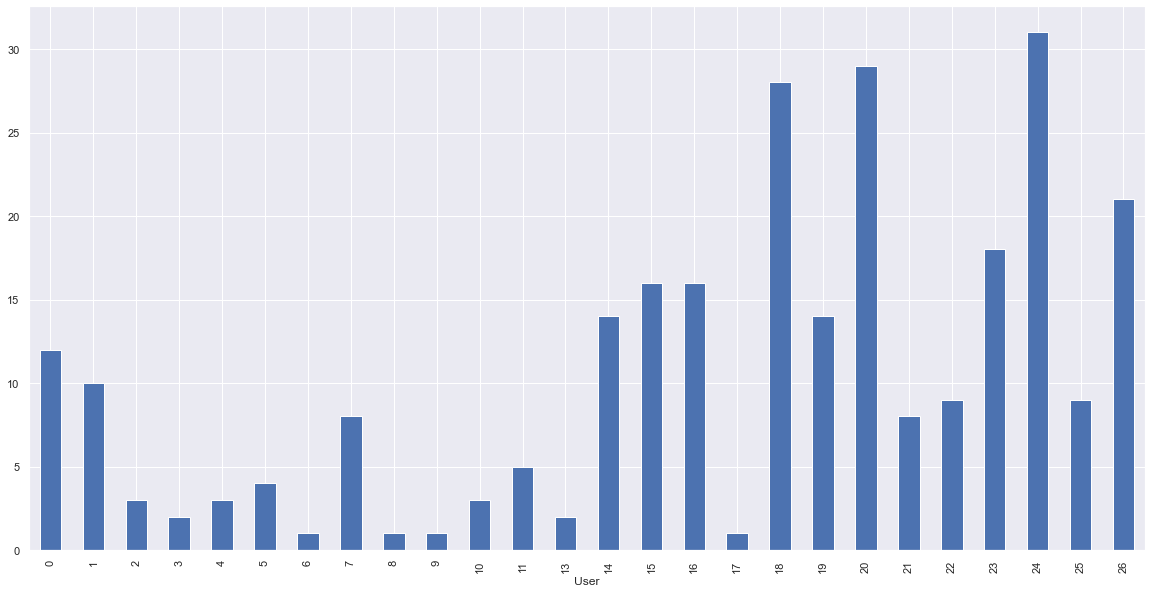

In [90]:
knnoutliersbyuser = outlier_values.groupby(['User'])['seconds'].count()
knnoutliersbyuser.plot(kind = 'bar')

In [92]:
knnoutliersbyuser

User
0     12
1     10
2      3
3      2
4      3
5      4
6      1
7      8
8      1
9      1
10     3
11     5
13     2
14    14
15    16
16    16
17     1
18    28
19    14
20    29
21     8
22     9
23    18
24    31
25     9
26    21
Name: seconds, dtype: int64

### IForest
Realizando analisis de Isolotion Forest en busqueda de Outliers

In [82]:
# importando libreria de scikit learn
from sklearn.ensemble import IsolationForest


Entrenando Isolation Forest
    * n_estimators = 100
    * max_samples = auto
    * contamination = 5%

In [83]:
#modelo con la columna seconds
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(poll[['seconds']])

IsolationForest(contamination=0.05, n_estimators=50)

In [84]:
#obteniedo columns "scores" en base a los resultados de analisis
poll['scores']=model.decision_function(poll[['seconds']]) 

# marcaremos anomalias (outliers) en una nueva columna identificandolas con "-1"
poll['anomaly']=model.predict(poll[['seconds']]) 
poll.head(20)

,User,seconds,acepta entrevista,estufa,scores,anomaly
0,13,682,2,2,0.181979,1
1,13,461,2,2,0.211514,1
2,22,384,2,2,0.190204,1
3,21,1742,2,2,-0.089049,-1
4,21,669,2,2,0.177476,1
5,24,797,2,2,0.138851,1
6,21,522,2,2,0.193880,1
7,20,645,2,2,0.183256,1
8,24,508,2,2,0.200375,1
9,21,525,2,2,0.197358,1


In [85]:
#nuevo dataframe con los outliers
anomalies =poll.loc[poll['anomaly']==-1]
anomalies_index=list(anomalies.index)
anomalies

,User,seconds,acepta entrevista,estufa,scores,anomaly
3,21,1742,2,2,-0.089049,-1
10,26,2071,2,2,-0.148585,-1
30,20,1523,2,2,-0.046615,-1
54,20,1146,2,2,-0.000849,-1
61,21,1259,2,2,-0.010013,-1
...,...,...,...,...,...,...
5802,3,1270,2,2,-0.012377,-1
5819,0,152,0,0,-0.061234,-1
5820,5,134,0,0,-0.064600,-1
5821,4,59,0,0,-0.092062,-1


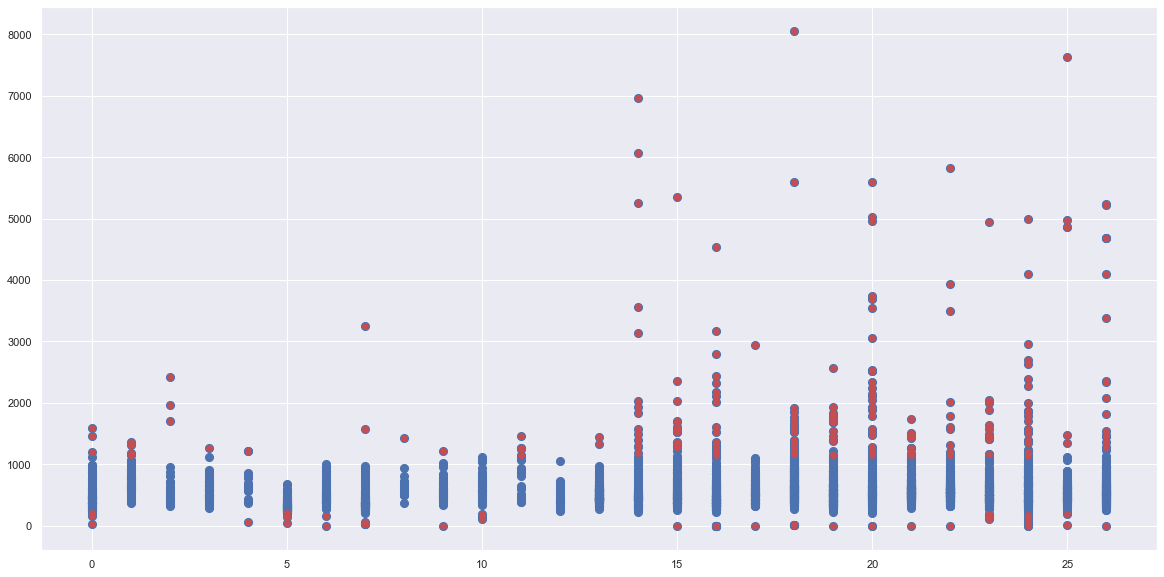

In [86]:
# Graficando nuestro dataframe original de color azul
plt.scatter(poll["User"], poll["seconds"], color = "b", s = 65)
# Graficando outliers de color rojo
plt.scatter(anomalies["User"], anomalies["seconds"], color = "r")

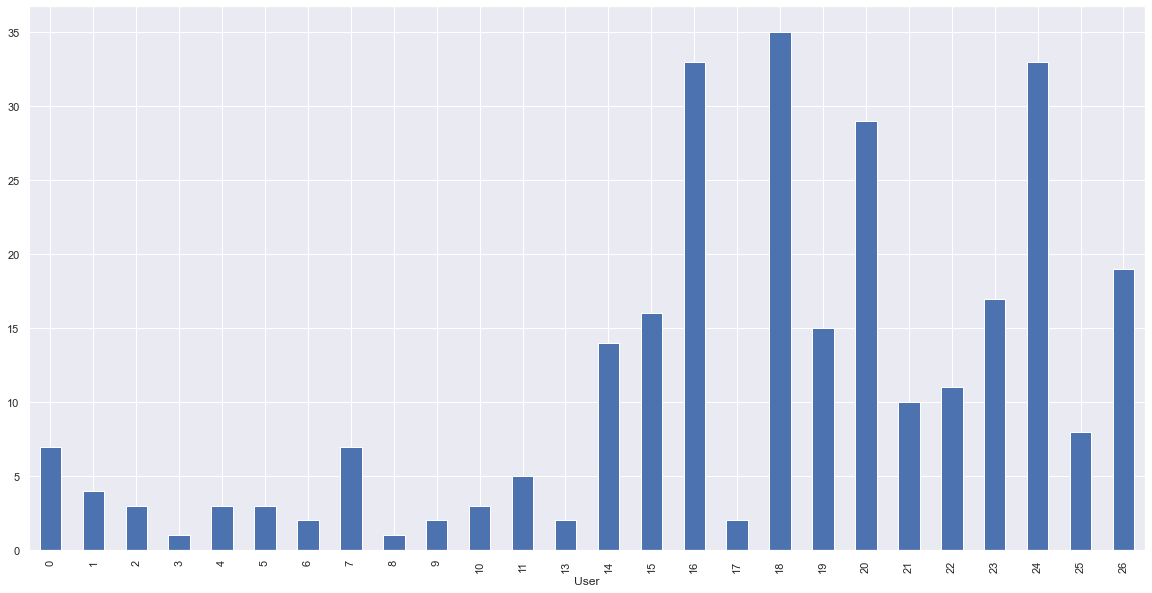

In [93]:
anomaliesbyuser = anomalies.groupby(['User'])['anomaly'].count()
anomaliesbyuser.plot(kind = 'bar')

In [94]:
anomaliesbyuser

User
0      7
1      4
2      3
3      1
4      3
5      3
6      2
7      7
8      1
9      2
10     3
11     5
13     2
14    14
15    16
16    33
17     2
18    35
19    15
20    29
21    10
22    11
23    17
24    33
25     8
26    19
Name: anomaly, dtype: int64